<a href="https://colab.research.google.com/github/scadriano/lia1-2023-2/blob/main/Introdu%C3%A7%C3%A3o%20Machine%20Learning%20-%20Classifica%C3%A7%C3%A3o/08_Aula_08_Aprendizado_de_M%C3%A1quina_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Machine Learning e Data Science - Classificação (1)**
Faremos a previsão de risco de concessão de crédito o cliente, usando algoritmo de Árvore de Decisão.

## Pré-processamento

In [2]:
# Carregar a base de dados
import pandas as pd
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

Atributos previsores (historia, divida, garantias, renda) - Atributo Classe (risco)

In [3]:
# Observarmos os registros (14)
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


### Separar em duas variáveis (X, y)

In [4]:
# Variável com os Previsores (X)
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
# Variável com a Classe (y)
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Conversão dos Atributos

In [6]:
# Conversão de Atributos de Categóricos para Numéricos
from sklearn.preprocessing import LabelEncoder

# Instanciar o objeto da classe LabelEncoder por variável
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [7]:
# Aplicar o processamento da conversão
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [8]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

### Salvar o arquivo .PKL

In [9]:
# Salvar/criar o arquivo com as duas variáveis
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

## Implementar o Algoritmo -> Árvore de decisão

In [10]:
# Importar o classificador baseado em Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Abrir o arquivo .pkl
with open('/content/risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [12]:
# Ver a variável - previsores
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [13]:
# Ver a variável - classe (alto, moderado ou baixo)
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Treinar o "algoritmo <-> dados" - Gerar a árvore - Modelo!

In [14]:
# Criar a árvore de decisão
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

# Treinamento
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# Qual atributo mais importante
arvore_risco_credito.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

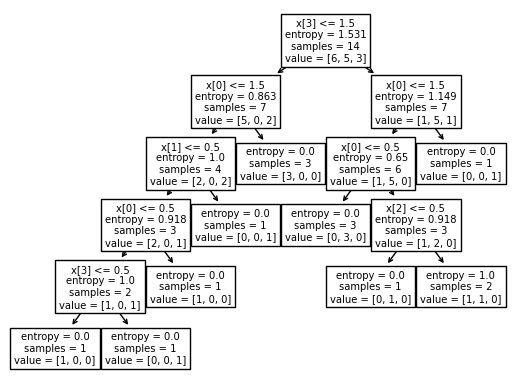

In [16]:
# Visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_risco_credito);

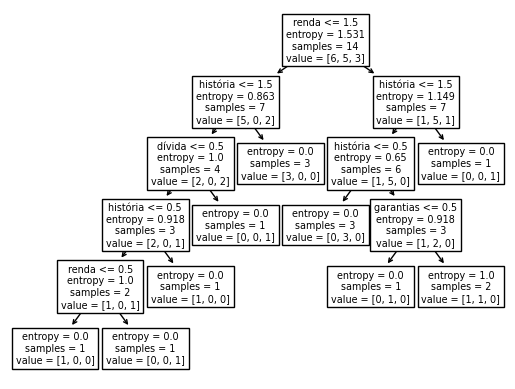

In [17]:
# Melhorar a visualização da árvore de decisão
previsores = ['história', 'dívida', 'garantias', 'renda']
tree.plot_tree(arvore_risco_credito, feature_names=previsores);

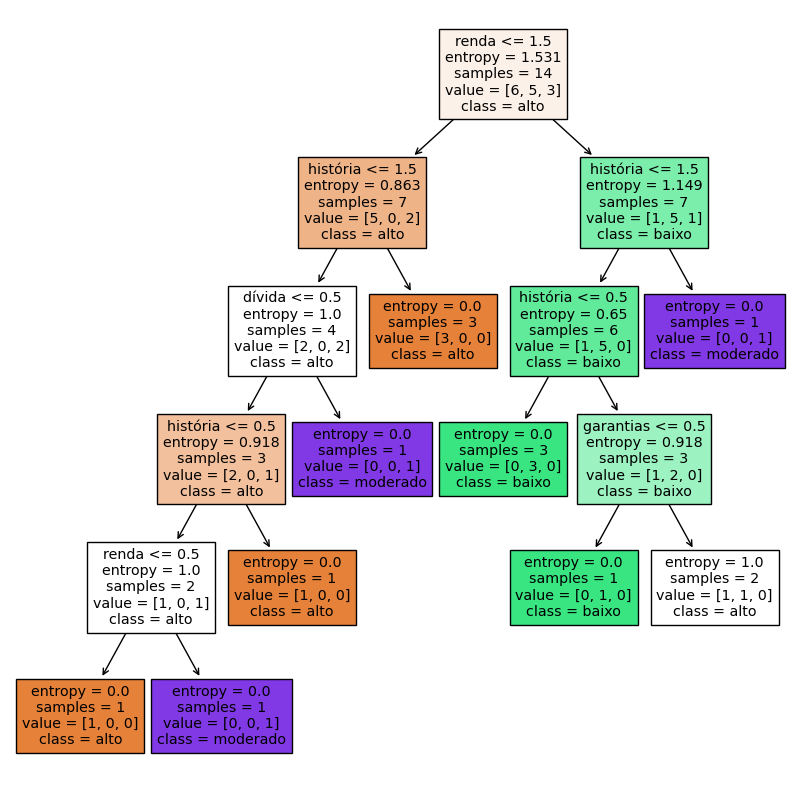

In [18]:
# Melhorar um pouco mais a visualização
import matplotlib.pyplot as plt
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

## Testar o modelo -> Informar registros de clientes

In [25]:
# Registro 1 - Cliente 1
# história boa, dívida alta, garantias nenhuma, renda > 35
#previsoes = arvore_risco_credito.predict([[0,0,1,2]])
#previsoes

# Registro 2 - Cliente 2
# história ruim, dívida alta, garantias adequada, renda < 15
#previsoes = arvore_risco_credito.predict([[2,0,0,0]])
#previsoes

# Seu cenário!
previsoes = arvore_risco_credito.predict([
    [2, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 2],
    [1, 1, 1, 2],
    [1, 1, 0, 2],
    [2, 1, 1, 0],
    [2, 1, 0, 2],
    [0, 1, 1, 2],
    [0, 0, 0, 2],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 1, 2],
    [2, 0, 1, 1]])
#previsoes
for n in previsoes:
    print(n)

alto
alto
moderado
alto
alto
baixo
alto
moderado
baixo
baixo
alto
moderado
baixo
alto
